<a href="https://colab.research.google.com/github/christopherhomen/talentotech/blob/main/Experiencia/2_Mini_Proyecto_Destino_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


════════════════════════════════════════
      🎵 MENÚ DE ANÁLISIS MUSICAL 🎵
════════════════════════════════════════
 1️⃣  Información general del dataset
 2️⃣  Top 10 artistas con más canciones
 3️⃣  Distribución de popularidad
 4️⃣  Evolución de canciones por año
 5️⃣  Correlación entre características de audio
 6️⃣  Géneros más frecuentes
 7️⃣  Canciones más populares
 8️⃣  📈 Análisis de regresión lineal (popularidad)
 0️⃣  Salir
════════════════════════════════════════

👉 Escribe el número de la opción que deseas: 2


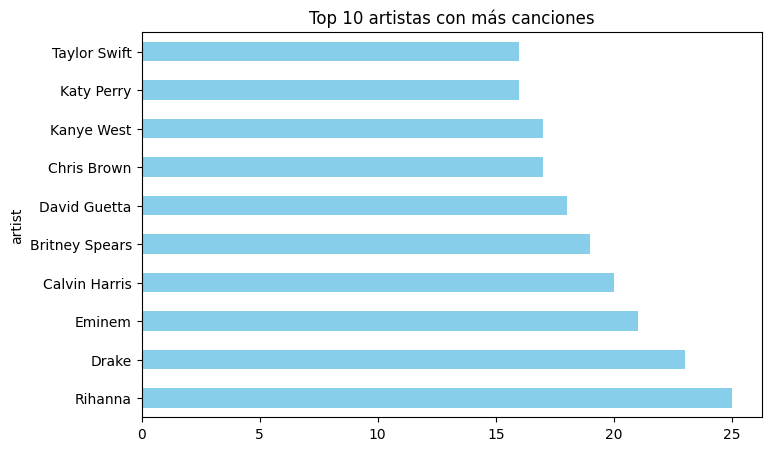


════════════════════════════════════════
      🎵 MENÚ DE ANÁLISIS MUSICAL 🎵
════════════════════════════════════════
 1️⃣  Información general del dataset
 2️⃣  Top 10 artistas con más canciones
 3️⃣  Distribución de popularidad
 4️⃣  Evolución de canciones por año
 5️⃣  Correlación entre características de audio
 6️⃣  Géneros más frecuentes
 7️⃣  Canciones más populares
 8️⃣  📈 Análisis de regresión lineal (popularidad)
 0️⃣  Salir
════════════════════════════════════════

👉 Escribe el número de la opción que deseas: 3


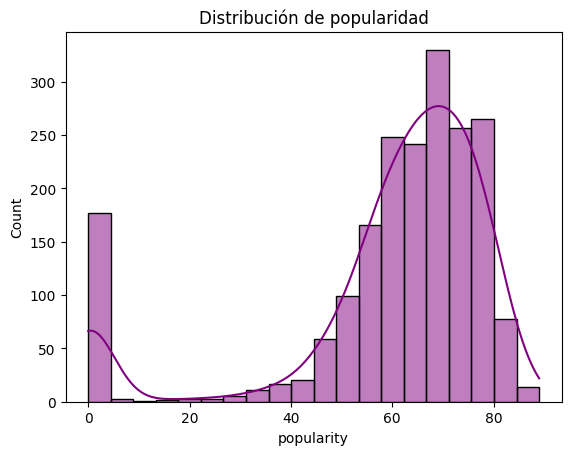


════════════════════════════════════════
      🎵 MENÚ DE ANÁLISIS MUSICAL 🎵
════════════════════════════════════════
 1️⃣  Información general del dataset
 2️⃣  Top 10 artistas con más canciones
 3️⃣  Distribución de popularidad
 4️⃣  Evolución de canciones por año
 5️⃣  Correlación entre características de audio
 6️⃣  Géneros más frecuentes
 7️⃣  Canciones más populares
 8️⃣  📈 Análisis de regresión lineal (popularidad)
 0️⃣  Salir
════════════════════════════════════════

👉 Escribe el número de la opción que deseas: 0
👋 ¡Gracias por usar el menú!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Cargar dataset
df = pd.read_csv("/content/sample_data/songs_normalize.csv")

def menu():
    print("\n" + "═" * 40)
    print("      🎵 MENÚ DE ANÁLISIS MUSICAL 🎵")
    print("═" * 40)
    print(" 1️⃣  Información general del dataset")
    print(" 2️⃣  Top 10 artistas con más canciones")
    print(" 3️⃣  Distribución de popularidad")
    print(" 4️⃣  Evolución de canciones por año")
    print(" 5️⃣  Correlación entre características de audio")
    print(" 6️⃣  Géneros más frecuentes")
    print(" 7️⃣  Canciones más populares")
    print(" 8️⃣  📈 Análisis de regresión lineal (popularidad)")
    print(" 0️⃣  Salir")
    print("═" * 40)

def ejecutar(opcion):
    if opcion == 1:
        print("\n📋 Información del DataFrame:")
        print(df.info())
        print("\n🔍 Primeras filas del dataset:")
        display(df.head())
        print("\n📊 Estadísticas descriptivas (numéricas):")
        display(df.describe())
        print("\n🔠 Estadísticas descriptivas (categóricas):")
        display(df.describe(include=['object', 'bool']))

    elif opcion == 2:
        top_artistas = df['artist'].value_counts().head(10)
        top_artistas.plot(kind="barh", figsize=(8,5), color="skyblue")
        plt.title("Top 10 artistas con más canciones")
        plt.show()

    elif opcion == 3:
        sns.histplot(df['popularity'], bins=20, kde=True, color="purple")
        plt.title("Distribución de popularidad")
        plt.show()

    elif opcion == 4:
        canciones_por_año = df['year'].value_counts().sort_index()
        canciones_por_año.plot(figsize=(10,5), color="green")
        plt.title("Evolución de canciones por año")
        plt.show()

    elif opcion == 5:
        plt.figure(figsize=(10,6))
        sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
        plt.title("Matriz de correlación entre características de audio")
        plt.show()

    elif opcion == 6:
        top_genres = df['genre'].value_counts().head(10)
        top_genres.plot(kind="bar", figsize=(8,5), color="orange")
        plt.title("Top 10 géneros más frecuentes")
        plt.show()

    elif opcion == 7:
        top_canciones = df[['artist','song','popularity']].sort_values(by="popularity", ascending=False).head(10)
        print("\n🎵 Top 10 canciones más populares:")
        display(top_canciones)

    elif opcion == 8:
        print("\n📈 Regresión Lineal: Popularidad en función de características de audio")

        X = df[['danceability','energy','loudness','speechiness','acousticness',
                'instrumentalness','liveness','valence','tempo']]
        y = df['popularity']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # 📊 Métricas
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        print(f"\n🔹 MSE: {mse:.2f}")
        print(f"🔹 RMSE: {rmse:.2f}")
        print(f"🔹 MAE: {mae:.2f}")
        print(f"🔹 R²: {r2:.2f}")

        # 📉 Gráfico Pred vs Real
        plt.figure(figsize=(7,5))
        plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
        plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
        plt.xlabel("Popularidad Real")
        plt.ylabel("Popularidad Predicha")
        plt.title("Predicción vs Realidad (Popularidad)")
        plt.show()

        # 🔔 Distribución de errores
        residuos = y_test - y_pred
        sns.histplot(residuos, bins=30, kde=True, color="red")
        plt.title("Distribución Gaussiana de los residuos")
        plt.show()

    elif opcion == 0:
        print("👋 ¡Gracias por usar el menú!")
        return False
    else:
        print("❌ Opción no válida")
    return True

# 🔹 Bucle interactivo
while True:
    menu()
    try:
        opcion = int(input("\n👉 Escribe el número de la opción que deseas: "))
        if not ejecutar(opcion):
            break
    except ValueError:
        print("⚠️ Por favor escribe un número válido.")



════════════════════════════════════════════════════
      📊 MENÚ DE REGRESIÓN LINEAL 🎶
════════════════════════════════════════════════════
 8️⃣  📈 Regresión lineal (popularidad) + métricas
 9️⃣  🗺️ Mapping de variables (coeficientes & permutación)
 🔟  🧪 Diagnóstico de errores (histograma + Q–Q plot)
 0️⃣  Salir
════════════════════════════════════════════════════

👉 Escribe el número de la opción que deseas: 1
❌ Opción no válida

════════════════════════════════════════════════════
      📊 MENÚ DE REGRESIÓN LINEAL 🎶
════════════════════════════════════════════════════
 8️⃣  📈 Regresión lineal (popularidad) + métricas
 9️⃣  🗺️ Mapping de variables (coeficientes & permutación)
 🔟  🧪 Diagnóstico de errores (histograma + Q–Q plot)
 0️⃣  Salir
════════════════════════════════════════════════════

👉 Escribe el número de la opción que deseas: 8

🧠 ¿Por qué estas columnas?
- Son numéricas con varianza > 0 y representan propiedades de audio que influyen en la popularidad.
- Usamos: ['danceab

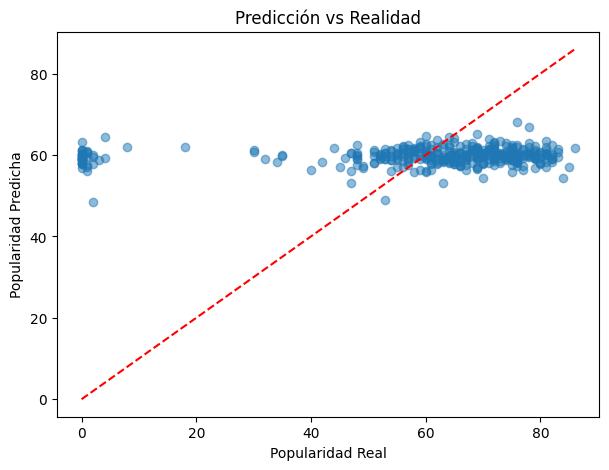

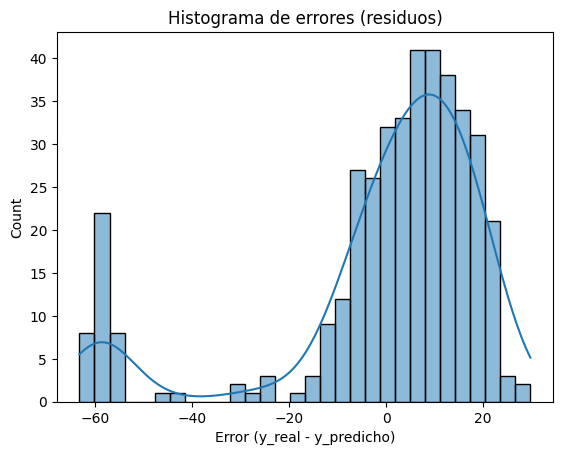


════════════════════════════════════════════════════
      📊 MENÚ DE REGRESIÓN LINEAL 🎶
════════════════════════════════════════════════════
 8️⃣  📈 Regresión lineal (popularidad) + métricas
 9️⃣  🗺️ Mapping de variables (coeficientes & permutación)
 🔟  🧪 Diagnóstico de errores (histograma + Q–Q plot)
 0️⃣  Salir
════════════════════════════════════════════════════

👉 Escribe el número de la opción que deseas: 9

🧠 ¿Por qué estas columnas?
- Son numéricas con varianza > 0 y representan propiedades de audio que influyen en la popularidad.
- Usamos: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'key', 'mode']

📏 ¿Para qué sirven estas métricas en tu data?
- MSE: penaliza errores grandes, compara modelos
- RMSE: igual que MSE pero en escala de popularidad
- MAE: error promedio absoluto, robusto a outliers
- R²: proporción de varianza explicada (0 a 1)

🔹 MSE:  472.289
🔹 RMSE: 21.732
🔹 MAE:  14.986


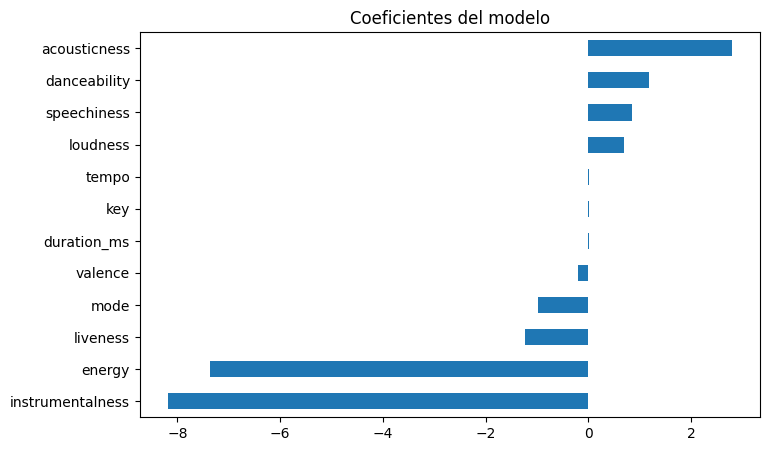

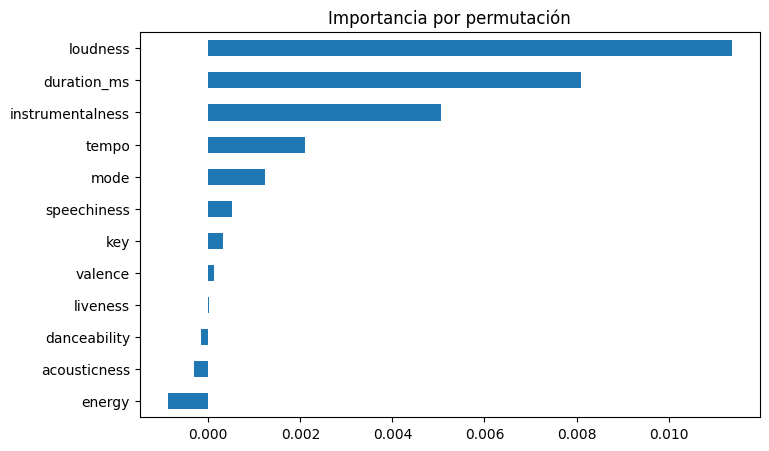


════════════════════════════════════════════════════
      📊 MENÚ DE REGRESIÓN LINEAL 🎶
════════════════════════════════════════════════════
 8️⃣  📈 Regresión lineal (popularidad) + métricas
 9️⃣  🗺️ Mapping de variables (coeficientes & permutación)
 🔟  🧪 Diagnóstico de errores (histograma + Q–Q plot)
 0️⃣  Salir
════════════════════════════════════════════════════

👉 Escribe el número de la opción que deseas: 10

🧠 ¿Por qué estas columnas?
- Son numéricas con varianza > 0 y representan propiedades de audio que influyen en la popularidad.
- Usamos: ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'key', 'mode']

📏 ¿Para qué sirven estas métricas en tu data?
- MSE: penaliza errores grandes, compara modelos
- RMSE: igual que MSE pero en escala de popularidad
- MAE: error promedio absoluto, robusto a outliers
- R²: proporción de varianza explicada (0 a 1)

🔹 MSE:  472.289
🔹 RMSE: 21.732
🔹 MAE:  14.986

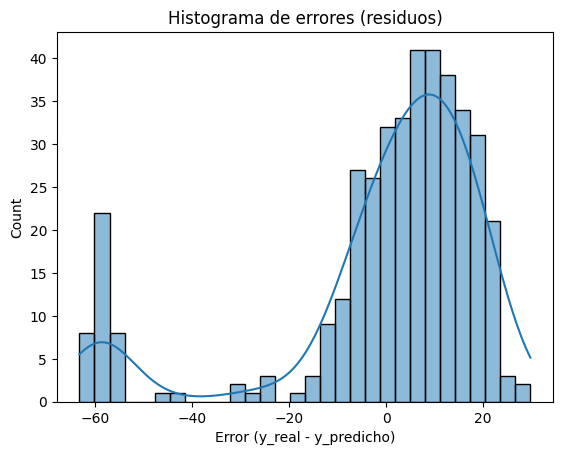

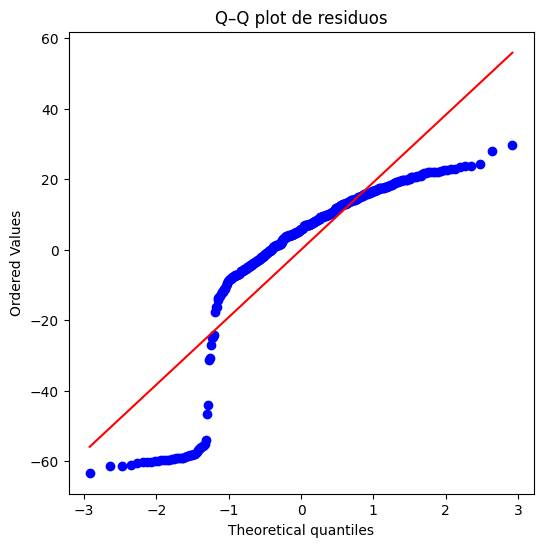


════════════════════════════════════════════════════
      📊 MENÚ DE REGRESIÓN LINEAL 🎶
════════════════════════════════════════════════════
 8️⃣  📈 Regresión lineal (popularidad) + métricas
 9️⃣  🗺️ Mapping de variables (coeficientes & permutación)
 🔟  🧪 Diagnóstico de errores (histograma + Q–Q plot)
 0️⃣  Salir
════════════════════════════════════════════════════

👉 Escribe el número de la opción que deseas: 0
👋 ¡Saliendo del menú de regresión!


In [2]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.inspection import permutation_importance

import scipy.stats as stats

# =========================================
# Carga de datos (asegúrate que df ya está definido en la celda anterior)
# =========================================
# df = pd.read_csv("/mnt/data/songs_normalize.csv")

# =========================================
# Funciones auxiliares
# =========================================
def seleccionar_features(df, target="popularity"):
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if target in num_cols:
        num_cols.remove(target)
    var_ok = [c for c in num_cols if df[c].var() > 0]
    candidatas_prioritarias = [
        'danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms',
        'key', 'mode'
    ]
    features = [c for c in candidatas_prioritarias if c in var_ok]
    return features if features else var_ok

def entrenar_modelo_regresion(df, target="popularity"):
    features = seleccionar_features(df, target)
    print("\n🧠 ¿Por qué estas columnas?")
    print(f"- Son numéricas con varianza > 0 y representan propiedades de audio que influyen en la popularidad.")
    print(f"- Usamos: {features}")

    X = df[features].copy()
    y = df[target].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n📏 ¿Para qué sirven estas métricas en tu data?")
    print("- MSE: penaliza errores grandes, compara modelos")
    print("- RMSE: igual que MSE pero en escala de popularidad")
    print("- MAE: error promedio absoluto, robusto a outliers")
    print("- R²: proporción de varianza explicada (0 a 1)")

    print(f"\n🔹 MSE:  {mse:.3f}")
    print(f"🔹 RMSE: {rmse:.3f}")
    print(f"🔹 MAE:  {mae:.3f}")
    print(f"🔹 R²:   {r2:.3f}")

    return model, X_test, y_test, y_pred, features

def plot_pred_vs_real(y_test, y_pred):
    plt.figure(figsize=(7,5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
    plt.plot(lims, lims, 'r--')
    plt.xlabel("Popularidad Real")
    plt.ylabel("Popularidad Predicha")
    plt.title("Predicción vs Realidad")
    plt.show()

def plot_hist_residuos(y_test, y_pred):
    residuos = y_test - y_pred
    sns.histplot(residuos, bins=30, kde=True)
    plt.title("Histograma de errores (residuos)")
    plt.xlabel("Error (y_real - y_predicho)")
    plt.show()
    return residuos

def plot_residuos_qq(residuos):
    plt.figure(figsize=(6,6))
    stats.probplot(residuos, dist="norm", plot=plt)
    plt.title("Q–Q plot de residuos")
    plt.show()

def plot_coef_mapping(model, features):
    coefs = pd.Series(model.coef_, index=features).sort_values()
    coefs.plot(kind="barh", figsize=(8,5))
    plt.title("Coeficientes del modelo")
    plt.show()

def plot_perm_importance(model, X_test, y_test):
    perm = permutation_importance(model, X_test, y_test, n_repeats=20, random_state=42)
    imp = pd.Series(perm.importances_mean, index=X_test.columns).sort_values()
    imp.plot(kind="barh", figsize=(8,5))
    plt.title("Importancia por permutación")
    plt.show()

# =========================================
# Nuevo menú dedicado a regresión
# =========================================
def menu_regresion():
    print("\n" + "═" * 52)
    print("      📊 MENÚ DE REGRESIÓN LINEAL 🎶")
    print("═" * 52)
    print(" 8️⃣  📈 Regresión lineal (popularidad) + métricas")
    print(" 9️⃣  🗺️ Mapping de variables (coeficientes & permutación)")
    print(" 🔟  🧪 Diagnóstico de errores (histograma + Q–Q plot)")
    print(" 0️⃣  Salir")
    print("═" * 52)

def ejecutar_regresion(opcion):
    if opcion == 8:
        model, X_test, y_test, y_pred, features = entrenar_modelo_regresion(df)
        plot_pred_vs_real(y_test, y_pred)
        plot_hist_residuos(y_test, y_pred)

    elif opcion == 9:
        model, X_test, y_test, y_pred, features = entrenar_modelo_regresion(df)
        plot_coef_mapping(model, features)
        plot_perm_importance(model, X_test, y_test)

    elif opcion == 10:
        model, X_test, y_test, y_pred, features = entrenar_modelo_regresion(df)
        residuos = plot_hist_residuos(y_test, y_pred)
        plot_residuos_qq(residuos)

    elif opcion == 0:
        print("👋 ¡Saliendo del menú de regresión!")
        return False
    else:
        print("❌ Opción no válida")
    return True

# 🔹 Bucle interactivo (segundo menú)
while True:
    menu_regresion()
    try:
        opcion = int(input("\n👉 Escribe el número de la opción que deseas: "))
        if not ejecutar_regresion(opcion):
            break
    except ValueError:
        print("⚠️ Escribe un número válido.")


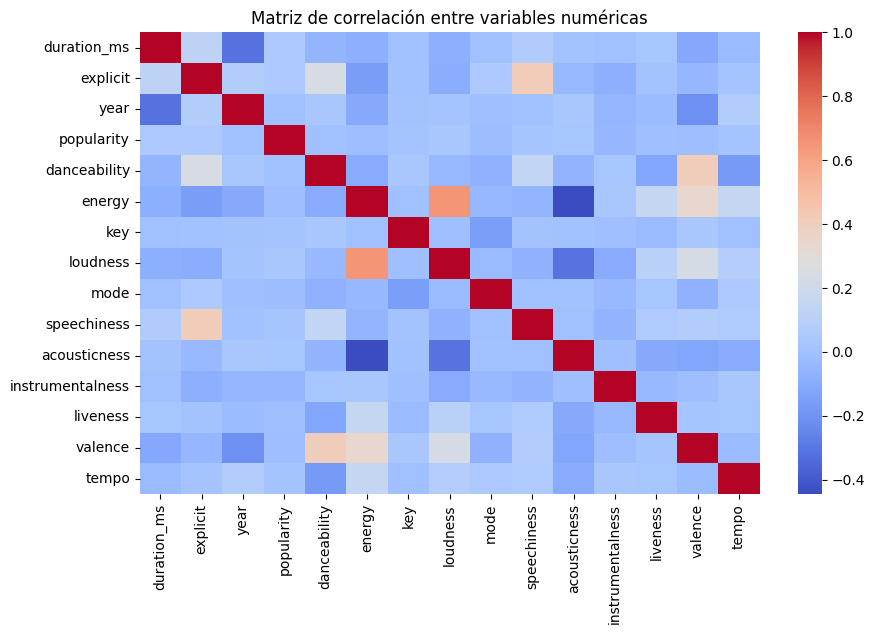


📊 Factor de inflación de la varianza (VIF):
             feature         VIF
0              const  209.136849
1       danceability    1.408076
2             energy    2.338859
3           loudness    1.804730
4        speechiness    1.057509
5       acousticness    1.291660
6   instrumentalness    1.045702
7           liveness    1.054180
8            valence    1.470390
9              tempo    1.070295
10       duration_ms    1.026506
11               key    1.026377
12              mode    1.036322

📑 Resumen del modelo OLS:
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.566
Date:                Thu, 18 Sep 2025   Prob (F-statistic):             0.0948
Time:                        02:32:41   Log-Likelihood:                

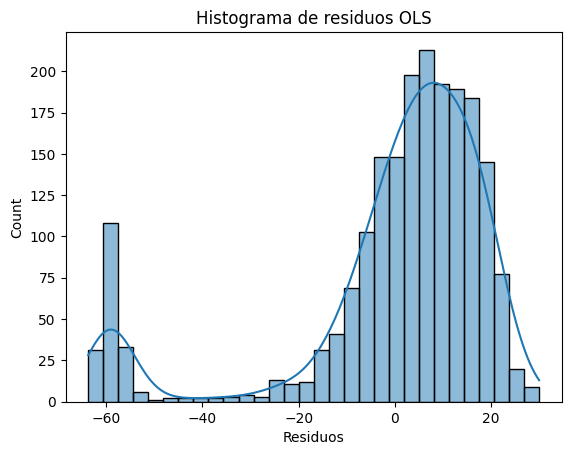

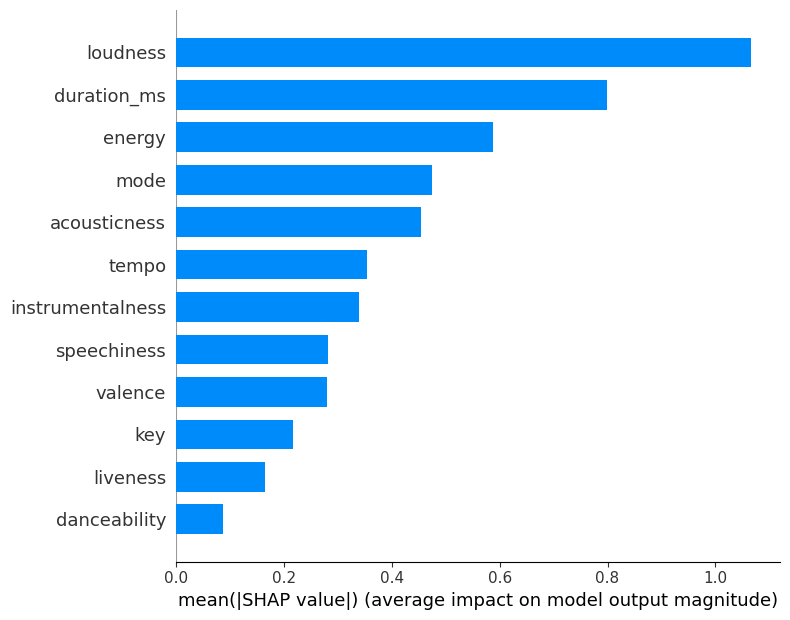

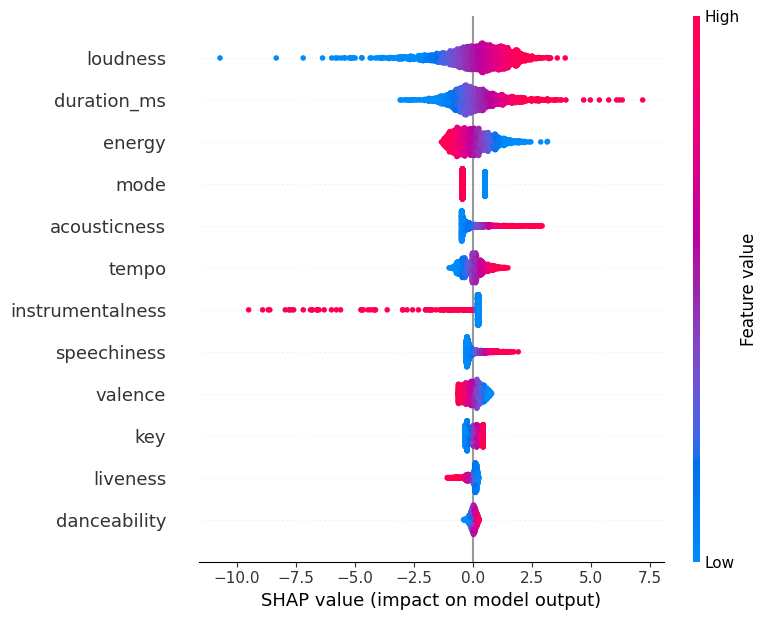

In [3]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import shap

# ==============================
# 1. Matriz de correlación
# ==============================
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

# ==============================
# 2. Revisar multicolinealidad (VIF)
# ==============================
features = seleccionar_features(df, target="popularity")
X = df[features]
X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]
print("\n📊 Factor de inflación de la varianza (VIF):")
print(vif_data)

# ==============================
# 3. Regresión OLS con statsmodels
# ==============================
y = df["popularity"]
ols_model = sm.OLS(y, X_const).fit()
print("\n📑 Resumen del modelo OLS:")
print(ols_model.summary())

# ==============================
# 4. Histograma de residuos (OLS)
# ==============================
residuos = ols_model.resid
sns.histplot(residuos, bins=30, kde=True)
plt.title("Histograma de residuos OLS")
plt.xlabel("Residuos")
plt.show()

# ==============================
# 5. SHAP Values
# ==============================
model = LinearRegression()
model.fit(X, y)

explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# Importancia media de las variables
shap.summary_plot(shap_values, X, plot_type="bar")

# Gráfico de resumen detallado
shap.summary_plot(shap_values, X)


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# Seleccionar features
features = seleccionar_features(df, target="popularity")
X = df[features]
y = df["popularity"]

# Escalado + Modelo (Ridge como ejemplo)
ridge = Pipeline([
    ("scaler", StandardScaler()),
    ("model", RidgeCV(alphas=np.logspace(-3, 3, 10), cv=5))
])

ridge.fit(X, y)
print("\nCoeficientes del modelo Ridge:")
print(dict(zip(features, ridge.named_steps['model'].coef_)))

# Validación cruzada
scores = cross_val_score(ridge, X, y, cv=5, scoring="r2")
print("\n📊 Validación cruzada R²:")
print(scores)
print(f"Promedio R²: {scores.mean():.3f}")



Coeficientes del modelo Ridge:
{'danceability': np.float64(0.03323972497590656), 'energy': np.float64(-0.2766907653581994), 'loudness': np.float64(0.6710274098521879), 'speechiness': np.float64(0.26948658821941507), 'acousticness': np.float64(0.3883320531101113), 'instrumentalness': np.float64(-0.6341348136681161), 'liveness': np.float64(-0.15602641109166698), 'valence': np.float64(-0.2250999777192364), 'tempo': np.float64(0.25344875954927193), 'duration_ms': np.float64(0.7150881442253754), 'key': np.float64(0.17917553098186173), 'mode': np.float64(-0.31147517779672085)}

📊 Validación cruzada R²:
[-0.0183145  -0.00991239 -0.00064188 -0.00087045 -0.01726668]
Promedio R²: -0.009


In [5]:
df.corr(numeric_only=True)['popularity'].sort_values(ascending=False)


,popularity
popularity,1.000000
duration_ms,0.050617
explicit,0.046605
loudness,0.030632
acousticness,0.024619
speechiness,0.021162
key,0.014823
tempo,0.014288
danceability,-0.003546
year,-0.003825


In [8]:
df2 = pd.get_dummies(df, columns=['genre'], drop_first=True)
df2

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,"genre_rock, blues","genre_rock, blues, latin","genre_rock, classical","genre_rock, easy listening","genre_rock, metal","genre_rock, pop","genre_rock, pop, Dance/Electronic","genre_rock, pop, metal","genre_rock, pop, metal, Dance/Electronic",genre_set()
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,False,False,False,False,False,False,False,False,False,False
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,False,False,False,False,False,True,False,False,False,False
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,False,False,False,False,False,False,False,False,False,False
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,False,False,False,False,True,False,False,False,False,False
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,...,False,False,False,False,False,False,False,False,False,False
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,...,False,False,False,False,False,False,False,False,False,False
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,...,False,False,False,False,False,False,False,False,False,False
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,...,False,False,False,False,False,False,False,False,False,False


In [9]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring="r2")
print("R² Promedio RF:", scores.mean())


R² Promedio RF: -0.0913814011196156


In [10]:
df2 = pd.get_dummies(df, columns=['genre'], drop_first=True)
df2

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,...,"genre_rock, blues","genre_rock, blues, latin","genre_rock, classical","genre_rock, easy listening","genre_rock, metal","genre_rock, pop","genre_rock, pop, Dance/Electronic","genre_rock, pop, metal","genre_rock, pop, metal, Dance/Electronic",genre_set()
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,...,False,False,False,False,False,False,False,False,False,False
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,...,False,False,False,False,False,True,False,False,False,False
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,...,False,False,False,False,False,False,False,False,False,False
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,...,False,False,False,False,True,False,False,False,False,False
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,...,False,False,False,False,False,False,False,False,False,False
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,...,False,False,False,False,False,False,False,False,False,False
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,...,False,False,False,False,False,False,False,False,False,False
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# =========================================
# Carga de datos (ya deberías tener df cargado)
# df = pd.read_csv("/mnt/data/songs_normalize.csv")

# =========================================
# Funciones auxiliares
# =========================================
def evaluar_modelo(X, y, titulo="Regresión"):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"\n📊 {titulo}")
    print(f"🔹 MSE:  {mse:.4f}")
    print(f"🔹 RMSE: {rmse:.4f}")
    print(f"🔹 MAE:  {mae:.4f}")
    print(f"🔹 R²:   {r2:.4f}")

    # Gráfico Pred vs Real
    plt.figure(figsize=(7,5))
    plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
    lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
    plt.plot(lims, lims, 'r--')
    plt.xlabel("Valor Real")
    plt.ylabel("Valor Predicho")
    plt.title(f"{titulo}: Pred vs Real")
    plt.show()

    # Histograma de residuos
    residuos = y_test - y_pred
    sns.histplot(residuos, bins=30, kde=True, color="orange")
    plt.title("Histograma de residuos")
    plt.xlabel("Error (y_real - y_predicho)")
    plt.show()


# =========================================
# Menú de regresión entre variables de audio
# =========================================
def menu_regresion_audio():
    print("\n" + "═" * 55)
    print("      🎼 MENÚ DE REGRESIONES ENTRE VARIABLES DE AUDIO")
    print("═" * 55)
    print(" 1️⃣  📈 Regresión simple: Energy → Loudness")
    print(" 2️⃣  📈 Regresión simple: Loudness → Energy")
    print(" 3️⃣  📊 Regresión múltiple: Loudness ~ (todas las demás features)")
    print(" 0️⃣  Salir")
    print("═" * 55)

def ejecutar_regresion_audio(opcion):
    if opcion == 1:
        X = df[["energy"]]
        y = df["loudness"]
        evaluar_modelo(X, y, titulo="Regresión Energy → Loudness")

    elif opcion == 2:
        X = df[["loudness"]]
        y = df["energy"]
        evaluar_modelo(X, y, titulo="Regresión Loudness → Energy")

    elif opcion == 3:
        drop_cols = ["popularity","artist","song","genre","explicit","year","loudness"]
        features = [c for c in df.columns if c not in drop_cols]
        X = df[features]
        y = df["loudness"]
        evaluar_modelo(X, y, titulo="Regresión múltiple para Loudness")

    elif opcion == 0:
        print("👋 ¡Saliendo del menú de regresiones de audio!")
        return False
    else:
        print("❌ Opción no válida")
    return True


# 🔹 Bucle interactivo
while True:
    menu_regresion_audio()
    try:
        opcion = int(input("\n👉 Escribe el número de la opción que deseas: "))
        if not ejecutar_regresion_audio(opcion):
            break
    except ValueError:
        print("⚠️ Escribe un número válido.")



═══════════════════════════════════════════════════════
      🎼 MENÚ DE REGRESIONES ENTRE VARIABLES DE AUDIO
═══════════════════════════════════════════════════════
 1️⃣  📈 Regresión simple: Energy → Loudness
 2️⃣  📈 Regresión simple: Loudness → Energy
 3️⃣  📊 Regresión múltiple: Loudness ~ (todas las demás features)
 0️⃣  Salir
═══════════════════════════════════════════════════════

👉 Escribe el número de la opción que deseas: 0
👋 ¡Saliendo del menú de regresiones de audio!



══════════════════════════════════════════════════════════════════════
      🎼 MENÚ DE REGRESIONES ENTRE VARIABLES DE AUDIO (EXPLICADAS)
══════════════════════════════════════════════════════════════════════
 1️⃣  📈 Regresión simple: Energy → Loudness (buena relación)
 2️⃣  📈 Regresión simple: Loudness → Energy
 3️⃣  📊 Regresión múltiple: Loudness ~ (todas las demás features de audio)
 0️⃣  Salir
══════════════════════════════════════════════════════════════════════

👉 Escribe el número de la opción que deseas: 1

══════════════════════════════════════════════════════════════════════
🎯 Regresión simple: Energy → Loudness
══════════════════════════════════════════════════════════════════════

🔎 Variables predictoras usadas:
• energy: Intensidad y actividad percibida (0–1). Valores altos = canciones rápidas, ruidosas,
densas.

🔎 Variables objetivo usadas:
• loudness: Sonoridad media de la pista en dB (valores más cercanos a 0 = más fuerte).

📏 ¿Qué significan estas métricas?
• MSE: Erro

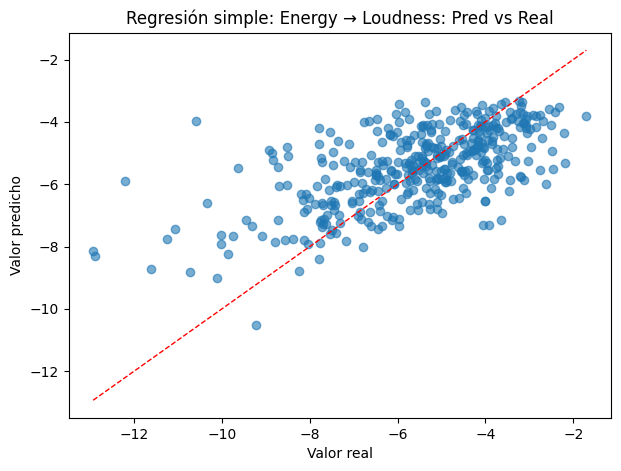

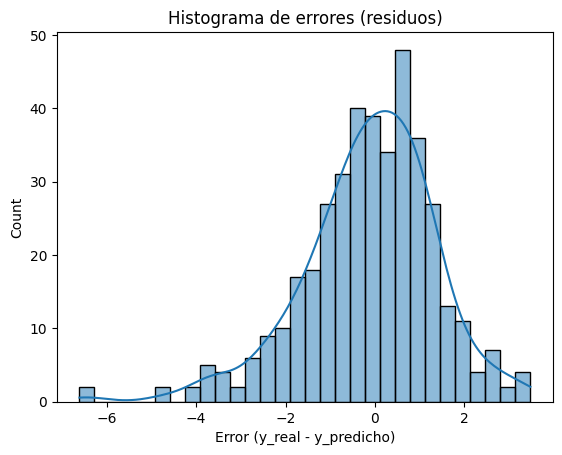


📌 Coeficientes del modelo (ordenados por |magnitud|):


,feature,coef
0,energy,8.289376



🧩 Interpretación rápida de coeficientes:
• Signo (+/-): relación directa/inversa con el objetivo, manteniendo las demás constantes.
• |coef| grande: mayor impacto por unidad en esa feature (ojo con escalas).

🧠 Conclusión automática:
• El modelo explica una proporción MODERADA de la variabilidad (0.35 ≤ R² < 0.60). Aceptable para demo.
• Residuos: media ≈ -0.131 (ideal ~0), desviación ≈ 1.478.
  Un histograma centrado en 0 sugiere que los errores no están sesgados.
• Objetivo evaluado: loudness.

══════════════════════════════════════════════════════════════════════
      🎼 MENÚ DE REGRESIONES ENTRE VARIABLES DE AUDIO (EXPLICADAS)
══════════════════════════════════════════════════════════════════════
 1️⃣  📈 Regresión simple: Energy → Loudness (buena relación)
 2️⃣  📈 Regresión simple: Loudness → Energy
 3️⃣  📊 Regresión múltiple: Loudness ~ (todas las demás features de audio)
 0️⃣  Salir
══════════════════════════════════════════════════════════════════════

👉 Escribe el número de la

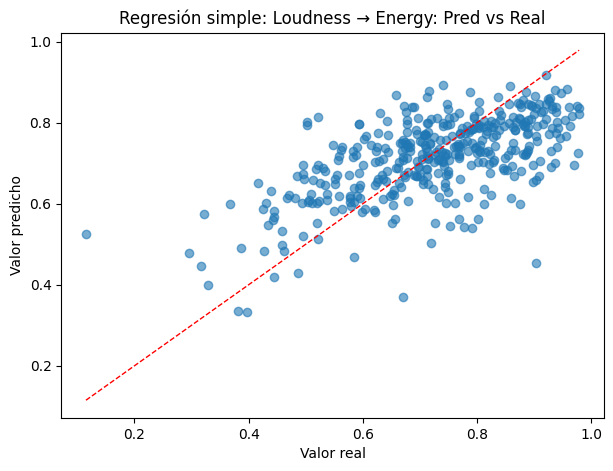

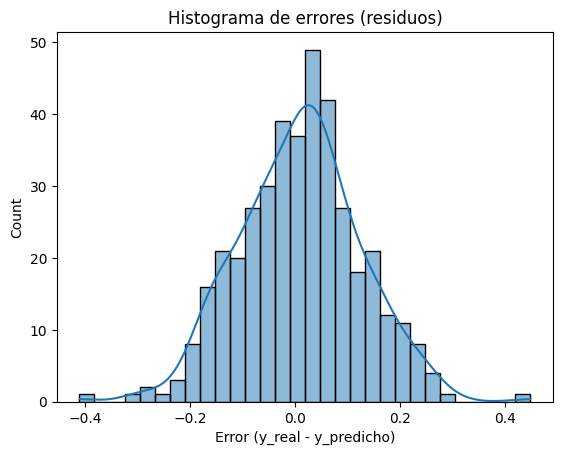


📌 Coeficientes del modelo (ordenados por |magnitud|):


,feature,coef
0,loudness,0.0521



🧩 Interpretación rápida de coeficientes:
• Signo (+/-): relación directa/inversa con el objetivo, manteniendo las demás constantes.
• |coef| grande: mayor impacto por unidad en esa feature (ojo con escalas).

🧠 Conclusión automática:
• El modelo explica una proporción MODERADA de la variabilidad (0.35 ≤ R² < 0.60). Aceptable para demo.
• Residuos: media ≈ 0.009 (ideal ~0), desviación ≈ 0.115.
  Un histograma centrado en 0 sugiere que los errores no están sesgados.
• Objetivo evaluado: energy.

══════════════════════════════════════════════════════════════════════
      🎼 MENÚ DE REGRESIONES ENTRE VARIABLES DE AUDIO (EXPLICADAS)
══════════════════════════════════════════════════════════════════════
 1️⃣  📈 Regresión simple: Energy → Loudness (buena relación)
 2️⃣  📈 Regresión simple: Loudness → Energy
 3️⃣  📊 Regresión múltiple: Loudness ~ (todas las demás features de audio)
 0️⃣  Salir
══════════════════════════════════════════════════════════════════════

👉 Escribe el número de la op

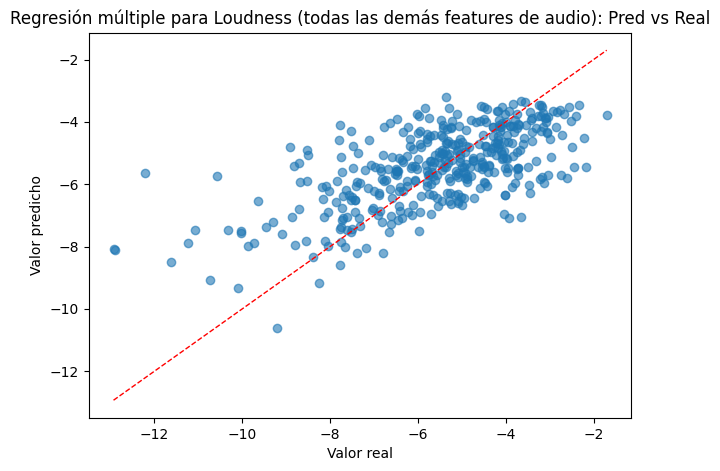

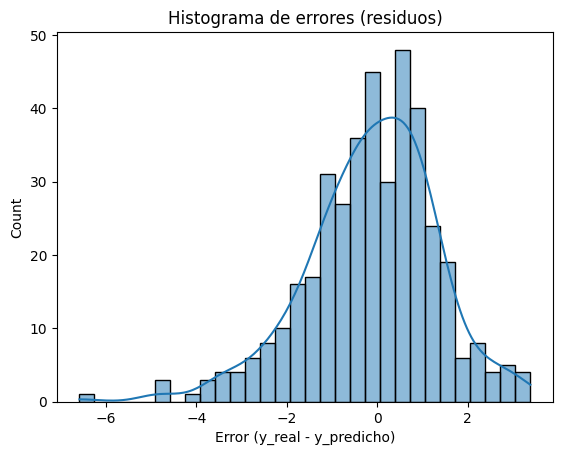


📌 Coeficientes del modelo (ordenados por |magnitud|):


,feature,coef
0,energy,8.153363
1,instrumentalness,-2.332697
2,speechiness,-1.110169
3,danceability,0.647699
4,acousticness,-0.532881
5,valence,-0.186043
6,liveness,0.110599
7,key,-0.005520
8,tempo,-0.000924
9,mode,0.000114



🧩 Interpretación rápida de coeficientes:
• Signo (+/-): relación directa/inversa con el objetivo, manteniendo las demás constantes.
• |coef| grande: mayor impacto por unidad en esa feature (ojo con escalas).

🧠 Conclusión automática:
• El modelo explica una proporción MODERADA de la variabilidad (0.35 ≤ R² < 0.60). Aceptable para demo.
• Residuos: media ≈ -0.132 (ideal ~0), desviación ≈ 1.442.
  Un histograma centrado en 0 sugiere que los errores no están sesgados.
• Objetivo evaluado: loudness.

══════════════════════════════════════════════════════════════════════
      🎼 MENÚ DE REGRESIONES ENTRE VARIABLES DE AUDIO (EXPLICADAS)
══════════════════════════════════════════════════════════════════════
 1️⃣  📈 Regresión simple: Energy → Loudness (buena relación)
 2️⃣  📈 Regresión simple: Loudness → Energy
 3️⃣  📊 Regresión múltiple: Loudness ~ (todas las demás features de audio)
 0️⃣  Salir
══════════════════════════════════════════════════════════════════════

👉 Escribe el número de la

In [15]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import fill

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# =========================================================
# Diccionario de significados de variables (Spotify-style)
# =========================================================
FEATURE_MEANINGS = {
    "danceability": "Qué tan bailable es una pista (0–1). Combina tempo, estabilidad del ritmo y regularidad.",
    "energy": "Intensidad y actividad percibida (0–1). Valores altos = canciones rápidas, ruidosas, densas.",
    "loudness": "Sonoridad media de la pista en dB (valores más cercanos a 0 = más fuerte).",
    "speechiness": "Proporción de palabras habladas (0–1). Alto ≈ podcasts o rap hablado.",
    "acousticness": "Confianza de que la pista es acústica (0–1). Alto = más acústica.",
    "instrumentalness": "Probabilidad de que NO haya voz (0–1). Alto ≈ instrumental.",
    "liveness": "Probabilidad de que sea grabación en vivo (0–1).",
    "valence": "‘Positividad’/alegría de la pista (0–1). Alto = alegre/positiva.",
    "tempo": "Tempo aproximado en BPM.",
    "duration_ms": "Duración de la pista en milisegundos.",
    "key": "Tonalidad estimada (0–11, donde 0=C, 1=C#/Db, etc.).",
    "mode": "Modo mayor (1) o menor (0).",
    "year": "Año de lanzamiento.",
    "explicit": "Contenido explícito (1) / no explícito (0)."
}

def describe_features(features, role="predictoras"):
    print("\n🔎 Variables {} usadas:".format(role))
    for f in features:
        if f in FEATURE_MEANINGS:
            txt = f"• {f}: {FEATURE_MEANINGS[f]}"
        else:
            txt = f"• {f}: (sin descripción específica)"
        print(fill(txt, width=100))

def explain_metrics():
    print("\n📏 ¿Qué significan estas métricas?")
    print("• MSE: Error cuadrático medio (penaliza fuerte errores grandes).")
    print("• RMSE: Raíz del MSE (en la MISMA escala del objetivo).")
    print("• MAE: Error absoluto medio (robusto a outliers).")
    print("• R²: Proporción de varianza explicada (0–1). Más cerca de 1 = mejor ajuste.")

def conclusion_auto(r2, residuos=None, nombre_objetivo=""):
    print("\n🧠 Conclusión automática:")
    if r2 >= 0.6:
        print("• El modelo explica una proporción ALTA de la variabilidad del objetivo (R² ≥ 0.60). Buen desempeño.")
    elif r2 >= 0.35:
        print("• El modelo explica una proporción MODERADA de la variabilidad (0.35 ≤ R² < 0.60). Aceptable para demo.")
    elif r2 > 0.05:
        print("• El modelo explica una proporción BAJA de la variabilidad (0.05 < R² < 0.35). Interpretar con cautela.")
    else:
        print("• El modelo casi no explica la variabilidad (R² ≤ 0.05). La relación es débil o no lineal.")
    if residuos is not None:
        bias = np.mean(residuos)
        std_res = np.std(residuos)
        print(f"• Residuos: media ≈ {bias:.3f} (ideal ~0), desviación ≈ {std_res:.3f}.")
        print("  Un histograma centrado en 0 sugiere que los errores no están sesgados.")
    if nombre_objetivo:
        print(f"• Objetivo evaluado: {nombre_objetivo}.")

def evaluar_modelo(X, y, titulo="Regresión", nombre_objetivo="", show_coefs=False):
    # Separar
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Entrenar
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Métricas
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("\n" + "═" * 70)
    print(f"🎯 {titulo}")
    print("═" * 70)

    # Descripciones de variables
    if isinstance(X, pd.DataFrame):
        describe_features(list(X.columns), role="predictoras")
    else:
        describe_features(["(matriz sin nombres)"], role="predictoras")
    describe_features([nombre_objetivo or "objetivo"], role="objetivo")

    # Métricas + explicación
    explain_metrics()
    print(f"\n🔹 MSE:  {mse:.4f}")
    print(f"🔹 RMSE: {rmse:.4f}")
    print(f"🔹 MAE:  {mae:.4f}")
    print(f"🔹 R²:   {r2:.4f}")

    # Gráfico Pred vs Real
    plt.figure(figsize=(7,5))
    plt.scatter(y_test, y_pred, alpha=0.6)
    lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
    plt.plot(lims, lims, 'r--', linewidth=1)
    plt.xlabel("Valor real")
    plt.ylabel("Valor predicho")
    plt.title(f"{titulo}: Pred vs Real")
    plt.show()

    # Histograma de residuos
    residuos = y_test - y_pred
    sns.histplot(residuos, bins=30, kde=True)
    plt.title("Histograma de errores (residuos)")
    plt.xlabel("Error (y_real - y_predicho)")
    plt.show()

    # Coeficientes (si aplica y tiene sentido)
    if show_coefs and hasattr(model, "coef_"):
        coefs = pd.Series(model.coef_, index=X.columns).sort_values(key=abs, ascending=False)
        print("\n📌 Coeficientes del modelo (ordenados por |magnitud|):")
        display(pd.DataFrame({
            "feature": coefs.index,
            "coef": coefs.values
        }))

        print("\n🧩 Interpretación rápida de coeficientes:")
        print("• Signo (+/-): relación directa/inversa con el objetivo, manteniendo las demás constantes.")
        print("• |coef| grande: mayor impacto por unidad en esa feature (ojo con escalas).")

    # Conclusión automática
    conclusion_auto(r2, residuos=residuos, nombre_objetivo=nombre_objetivo)

    return {
        "model": model,
        "r2": r2,
        "mse": mse,
        "rmse": rmse,
        "mae": mae,
        "features": list(X.columns) if isinstance(X, pd.DataFrame) else None
    }

# =========================================================
# MENÚ: Regresiones útiles entre variables de audio
# (Descubrimos que popularity no se deja, pero entre audio sí hay señal)
# =========================================================
def menu_regresion_audio():
    print("\n" + "═" * 70)
    print("      🎼 MENÚ DE REGRESIONES ENTRE VARIABLES DE AUDIO (EXPLICADAS)")
    print("═" * 70)
    print(" 1️⃣  📈 Regresión simple: Energy → Loudness (buena relación)")
    print(" 2️⃣  📈 Regresión simple: Loudness → Energy")
    print(" 3️⃣  📊 Regresión múltiple: Loudness ~ (todas las demás features de audio)")
    print(" 0️⃣  Salir")
    print("═" * 70)

def ejecutar_regresion_audio(opcion):
    # Asegúrate de tener df en el entorno con las columnas esperadas
    if opcion == 1:
        X = df[["energy"]]
        y = df["loudness"]
        evaluar_modelo(X, y, titulo="Regresión simple: Energy → Loudness",
                       nombre_objetivo="loudness", show_coefs=True)

    elif opcion == 2:
        X = df[["loudness"]]
        y = df["energy"]
        evaluar_modelo(X, y, titulo="Regresión simple: Loudness → Energy",
                       nombre_objetivo="energy", show_coefs=True)

    elif opcion == 3:
        # Variables a excluir que no son puramente audio o son ID
        drop_cols = ["popularity","artist","song","genre","explicit","year","loudness"]
        features = [c for c in df.columns if c not in drop_cols]
        X = df[features]
        y = df["loudness"]
        evaluar_modelo(X, y, titulo="Regresión múltiple para Loudness (todas las demás features de audio)",
                       nombre_objetivo="loudness", show_coefs=True)

    elif opcion == 0:
        print("👋 ¡Saliendo del menú de regresiones de audio!")
        return False
    else:
        print("❌ Opción no válida")
    return True

# 🔹 Bucle interactivo
while True:
    menu_regresion_audio()
    try:
        opcion = int(input("\n👉 Escribe el número de la opción que deseas: "))
        if not ejecutar_regresion_audio(opcion):
            break
    except ValueError:
        print("⚠️ Escribe un número válido.")



══════════════════════════════════════════════════════════════════════
      🎼 MENÚ (con explicaciones simples)
══════════════════════════════════════════════════════════════════════
 1️⃣  Energy → Loudness  (relación moderada)
 2️⃣  Loudness → Energy  (similar fuerza)
 3️⃣  Loudness ~ (todas las demás de audio)
 0️⃣  Salir
══════════════════════════════════════════════════════════════════════

👉 Escribe el número de la opción: 1

🔎 Qué estoy probando:
• Quiero predecir **loudness** usando 1 variable(s):
   - energy: Energía/intensidad (0–1).
• Objetivo: loudness: Sonoridad media en dB (más cerca a 0 = más fuerte).

📏 Cómo leer esto (súper simple):
• R² (0 a 1): qué tanto explica el modelo. Más alto = mejor.
• MAE/RMSE: tamaño del error promedio. Más bajo = mejor.

👉 Resultados:
   - R²   = 0.388
   - MAE  = 1.113
   - RMSE = 1.483
   - MSE  = 2.200

🧠 Conclusión en 1 línea:
• Bien/moderado: hay relación útil (0.35 ≤ R² < 0.60).

🧩 ¿Para qué me sirve en el informe?
• Puedes decir: “Sí

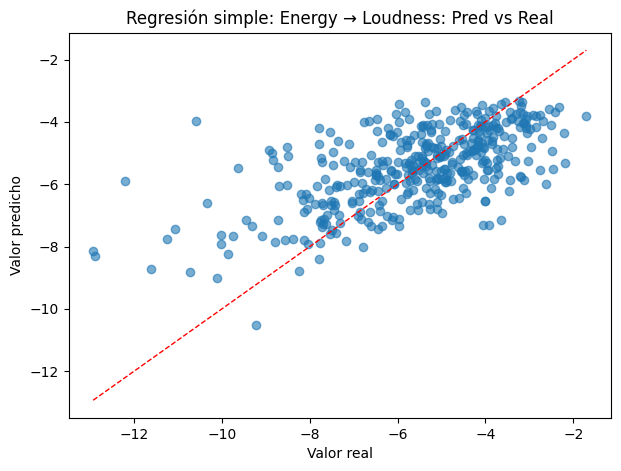

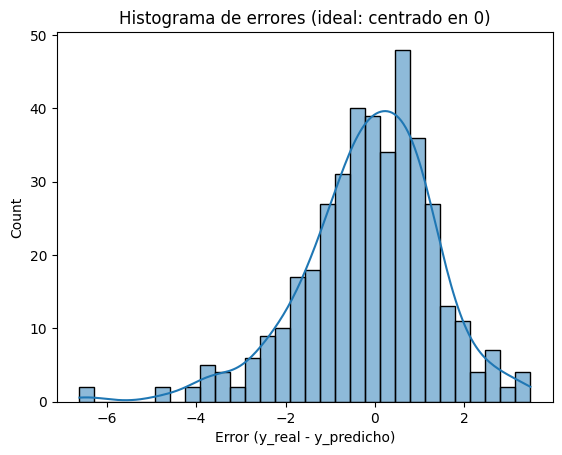

📌 Residuos: media ≈ -0.131 (ideal ~0). Desv. estándar ≈ 1.478.

══════════════════════════════════════════════════════════════════════
      🎼 MENÚ (con explicaciones simples)
══════════════════════════════════════════════════════════════════════
 1️⃣  Energy → Loudness  (relación moderada)
 2️⃣  Loudness → Energy  (similar fuerza)
 3️⃣  Loudness ~ (todas las demás de audio)
 0️⃣  Salir
══════════════════════════════════════════════════════════════════════

👉 Escribe el número de la opción: 2

🔎 Qué estoy probando:
• Quiero predecir **energy** usando 1 variable(s):
   - loudness: Sonoridad media en dB (más cerca a 0 = más fuerte).
• Objetivo: energy: Energía/intensidad (0–1).

📏 Cómo leer esto (súper simple):
• R² (0 a 1): qué tanto explica el modelo. Más alto = mejor.
• MAE/RMSE: tamaño del error promedio. Más bajo = mejor.

👉 Resultados:
   - R²   = 0.387
   - MAE  = 0.091
   - RMSE = 0.116
   - MSE  = 0.013

🧠 Conclusión en 1 línea:
• Bien/moderado: hay relación útil (0.35 ≤ R² < 0.

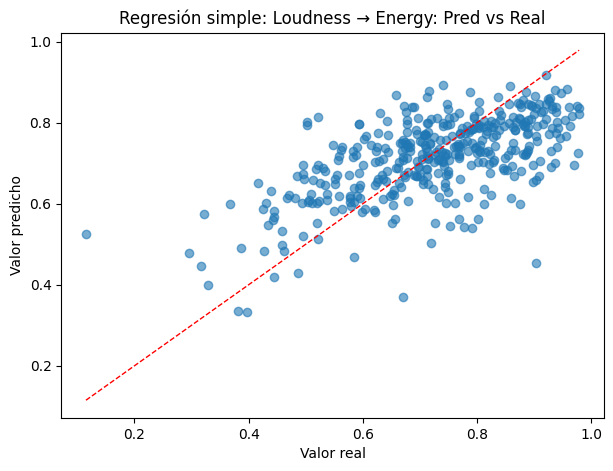

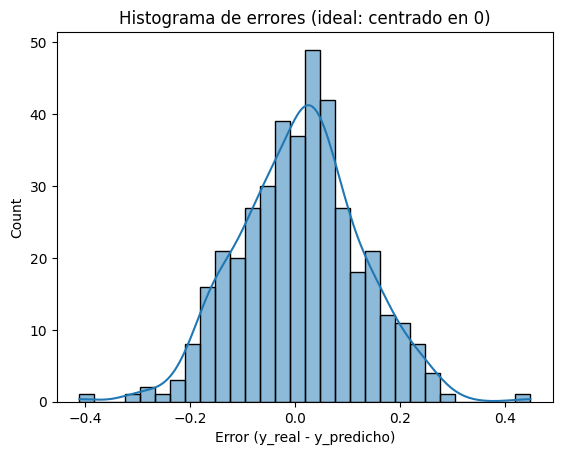

📌 Residuos: media ≈ 0.009 (ideal ~0). Desv. estándar ≈ 0.115.

══════════════════════════════════════════════════════════════════════
      🎼 MENÚ (con explicaciones simples)
══════════════════════════════════════════════════════════════════════
 1️⃣  Energy → Loudness  (relación moderada)
 2️⃣  Loudness → Energy  (similar fuerza)
 3️⃣  Loudness ~ (todas las demás de audio)
 0️⃣  Salir
══════════════════════════════════════════════════════════════════════


In [ ]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import fill

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Diccionario corto (descripciones simples)
FEATURE_SHORT = {
    "energy": "Energía/intensidad (0–1).",
    "loudness": "Sonoridad media en dB (más cerca a 0 = más fuerte).",
    "danceability": "Qué tan bailable (0–1).",
    "valence": "Qué tan alegre/positiva (0–1).",
    "acousticness": "Qué tan acústica (0–1).",
    "instrumentalness": "Probabilidad de ser instrumental (0–1).",
    "speechiness": "Proporción de habla (0–1).",
    "liveness": "Probabilidad de ser en vivo (0–1).",
    "tempo": "Tempo en BPM.",
    "duration_ms": "Duración en milisegundos.",
    "key": "Tonalidad (0–11).",
    "mode": "Modo mayor (1) o menor (0)."
}

def explica_vars_simplito(vars_pred, var_target):
    print("\n🔎 Qué estoy probando:")
    print(f"• Quiero predecir **{var_target}** usando {len(vars_pred)} variable(s):")
    for v in vars_pred:
        desc = FEATURE_SHORT.get(v, "(sin descripción)")
        print(f"   - {v}: {desc}")
    desc_t = FEATURE_SHORT.get(var_target, "(sin descripción)")
    print(f"• Objetivo: {var_target}: {desc_t}")

def explica_metricas_simplito(mse, rmse, mae, r2):
    print("\n📏 Cómo leer esto (súper simple):")
    print("• R² (0 a 1): qué tanto explica el modelo. Más alto = mejor.")
    print("• MAE/RMSE: tamaño del error promedio. Más bajo = mejor.")
    print(f"\n👉 Resultados:")
    print(f"   - R²   = {r2:.3f}")
    print(f"   - MAE  = {mae:.3f}")
    print(f"   - RMSE = {rmse:.3f}")
    print(f"   - MSE  = {mse:.3f}")

    print("\n🧠 Conclusión en 1 línea:")
    if r2 >= 0.60:
        print("• Muy bien: el modelo explica gran parte del objetivo (R² ≥ 0.60).")
    elif r2 >= 0.35:
        print("• Bien/moderado: hay relación útil (0.35 ≤ R² < 0.60).")
    elif r2 > 0.05:
        print("• Bajito: hay algo de relación, pero débil (0.05 < R² < 0.35).")
    else:
        print("• Casi nada: el modelo no logra explicar el objetivo (R² ≤ 0.05).")

    print("\n🧩 ¿Para qué me sirve en el informe?")
    if r2 >= 0.35:
        print("• Puedes decir: “Sí hay relación entre variables de audio; este modelo predice el objetivo de forma moderada”.")
    else:
        print("• Puedes decir: “La relación es muy débil; se requieren otras variables o modelos no lineales”.")

def graficos_simplitos(y_test, y_pred, titulo):
    # Pred vs Real
    plt.figure(figsize=(7,5))
    plt.scatter(y_test, y_pred, alpha=0.6)
    lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
    plt.plot(lims, lims, 'r--', linewidth=1)
    plt.xlabel("Valor real")
    plt.ylabel("Valor predicho")
    plt.title(f"{titulo}: Pred vs Real")
    plt.show()

    # Histograma de errores
    residuos = y_test - y_pred
    sns.histplot(residuos, bins=30, kde=True)
    plt.title("Histograma de errores (ideal: centrado en 0)")
    plt.xlabel("Error (y_real - y_predicho)")
    plt.show()

    print(f"📌 Residuos: media ≈ {np.mean(residuos):.3f} (ideal ~0). "
          f"Desv. estándar ≈ {np.std(residuos):.3f}.")

def correr_regresion_simple(var_x, var_y, titulo):
    X = df[[var_x]]
    y = df[var_y]
    explica_vars_simplito([var_x], var_y)

    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression().fit(X_tr, y_tr)
    y_pr = model.predict(X_te)

    mse = mean_squared_error(y_te, y_pr)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_te, y_pr)
    r2 = r2_score(y_te, y_pr)

    explica_metricas_simplito(mse, rmse, mae, r2)
    print("\n📌 Coeficiente:")
    print(f"• Si {var_x} sube 1 unidad, {var_y} cambia ≈ {model.coef_[0]:.4f} (en promedio).")
    graficos_simplitos(y_te, y_pr, titulo)

def correr_regresion_multiple(target, drop_cols):
    features = [c for c in df.columns if c not in drop_cols]
    X = df[features]
    y = df[target]
    explica_vars_simplito(features, target)

    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression().fit(X_tr, y_tr)
    y_pr = model.predict(X_te)

    mse = mean_squared_error(y_te, y_pr)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_te, y_pr)
    r2 = r2_score(y_te, y_pr)

    explica_metricas_simplito(mse, rmse, mae, r2)

    # Coeficientes ordenados por impacto
    coefs = pd.Series(model.coef_, index=features).sort_values(key=np.abs, ascending=False)
    print("\n📌 ¿Qué variables pesan más en este modelo? (ordenadas por impacto absoluto)")
    display(pd.DataFrame({"feature": coefs.index, "coef": coefs.values}).head(10))

    print("\n🧩 Cómo leer los coeficientes (versión simple):")
    print("• Signo (+/-): si sube la feature, el objetivo tiende a subir/bajar.")
    print("• Magnitud: cuánto cambia el objetivo por unidad (cuidado con escalas distintas).")

    graficos_simplitos(y_te, y_pr, f"Regresión múltiple para {target}")

# ============
# MENÚ SIMPLE
# ============
def menu_regresion_audio_simple():
    print("\n" + "═" * 70)
    print("      🎼 MENÚ (con explicaciones simples)")
    print("═" * 70)
    print(" 1️⃣  Energy → Loudness  (relación moderada)")
    print(" 2️⃣  Loudness → Energy  (similar fuerza)")
    print(" 3️⃣  Loudness ~ (todas las demás de audio)")
    print(" 0️⃣  Salir")
    print("═" * 70)

def ejecutar_regresion_audio_simple(opcion):
    if opcion == 1:
        correr_regresion_simple("energy", "loudness", "Regresión simple: Energy → Loudness")
    elif opcion == 2:
        correr_regresion_simple("loudness", "energy", "Regresión simple: Loudness → Energy")
    elif opcion == 3:
        drop_cols = ["popularity","artist","song","genre","explicit","year","loudness"]
        correr_regresion_multiple(target="loudness", drop_cols=drop_cols)
    elif opcion == 0:
        print("👋 ¡Listo!")
        return False
    else:
        print("❌ Opción no válida")
    return True

# 🔁 Bucle
while True:
    menu_regresion_audio_simple()
    try:
        op = int(input("\n👉 Escribe el número de la opción: "))
        if not ejecutar_regresion_audio_simple(op):
            break
    except ValueError:
        print("⚠️ Escribe un número válido.")
